# Sequential neural networks

## Structure

Neural networks are basically very complicated functions that depend on a very large number of parameters. Their action can be expressed as the combination of a certain number of simpler functions, called neurons.  
A neural network is organized as a sequence of layers of neurons, where the output of each layer is the input of the following layer.  
In a dense network, where each neuron of a layer is connected to all the neurons of the previous and following layers, it takes as an input the weighted sum of the previous layers' outputs, and shifts them by a term called bias. Then, the shifted input is fed into a specific function, called the activation function.  
Let $\vec{x}$ be the output of a layer and $\vec{w}$ , $b$ be the vector of weights and the bias associated with one of the neurons of the following layer, with activation function $f$. Then, the output of such neuron is: $$ f(\vec{w} \cdot \vec{x} + b) \text{.} $$  
In matrix notation, the output $\vec{x}_{i+1}$ of the $(i+1)^{th}$ layer is: 
$$ \vec{x}_{i+1} = f(W\vec{x}_i + \vec{b}_{i+1}) \text{.}$$
Where $W$ is a matrix whose elements are the weights and the function $f$ must be understood to act on each component of the argument vector.

## Supervised learning

In order for the neural network to return the desired output, the huge number of parameters must be finely tuned. It is obvious that even for fairly simple networks, this task cannot be performed by hand or with analytical methods (the activation functions are in general non-linear).  
One solution is to train the network with some labeled data (the label being the output we know to be associated with the data value) and compare the output returned by the network with the label associated with the input data.  
The cost function is a metric that quantifies the distance between the desired output and the returned one. Then, well understood optimization methods, such as stochastic gradient descent, are use to find the global minimum of the cost function in the space of parameters.

## Some caveats

Training data may be a result of a stochastic process underlying a deterministic law disturbed by random noise. In this case, we want the network to learn the deterministic law, automatically correcting the noise.  
In principle, the cost function associated to the training data, that we call $E_{in}$ can be made arbitrarily small, given a sufficiently expressive network. This does not mean that the network is doing better, on the contrary it is learning the random noise too. This is a problem because it means that the network will perform very poorly if given an input that it has never met before.  
That's why during the training process the network is also fed with another set of data, called validation data, usually smaller than the training data.  
The cost function evaluated on the validation data gives the so called generalization error $E_{out}$, which is usually greater than the training error.  
The network is efficient when the right balance between $E_{in}$ and $E_{out}$ is found.

# Exercise 11.1

This exercise consists in the training of a neural network to perform the fit of a linear function $$ y=2x+1 \text{.}$$
The problem is so simple that we actually need just one neuron, the output one, with the identity as activation function. As a matter of fact, the output of this network is: $$ y = I(wx + b) = wx + b \text{,}$$ 
which is already a linear function. We expect, after the training, that $w \simeq 2$ and $ b \simeq 1 $.

In [13]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 5000)
x_valid = np.random.uniform(-1, 1, 500)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

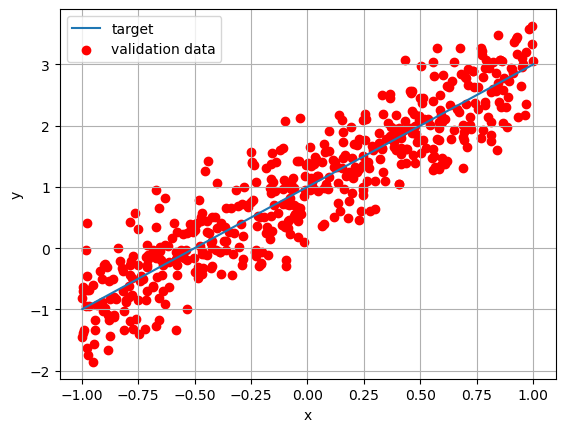

In [16]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [15]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [17]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
157/157 [==============================] - 2s 5ms/step - loss: 0.4810 - mse: 0.4810 - val_loss: 0.2581 - val_mse: 0.2581
Epoch 2/30
157/157 [==============================] - 0s 2ms/step - loss: 0.2549 - mse: 0.2549 - val_loss: 0.2393 - val_mse: 0.2393
Epoch 3/30
157/157 [==============================] - 0s 2ms/step - loss: 0.2464 - mse: 0.2464 - val_loss: 0.2380 - val_mse: 0.2380
Epoch 4/30
157/157 [==============================] - 0s 2ms/step - loss: 0.2455 - mse: 0.2455 - val_loss: 0.2381 - val_mse: 0.2381
Epoch 5/30
157/157 [==============================] - 0s 2ms/step - loss: 0.2454 - mse: 0.2454 - val_loss: 0.2381 - val_mse: 0.2381
Epoch 6/30
157/157 [==============================] - 0s 2ms/step - loss: 0.2454 - mse: 0.2454 - val_loss: 0.2382 - val_mse: 0.2382
Epoch 7/30
157/157 [==============================] - 0s 3ms/step - loss: 0.2453 - mse: 0.2453 - val_loss: 0.2382 - val_mse: 0.2382
Epoch 8/30
157/157 [==============================] - 1s 3ms/step - loss: 0.

In [18]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 2ms/step - loss: 0.2385 - mse: 0.2385

Test loss: 0.23849712312221527
Test accuracy: 0.23849712312221527
16/16 [==============================] - 0s 3ms/step - loss: 4.6900e-04 - mse: 4.6900e-04

Test loss: 0.0004689971683546901
Test accuracy: 0.0004689971683546901


4/4 [==============================] - 0s 3ms/step


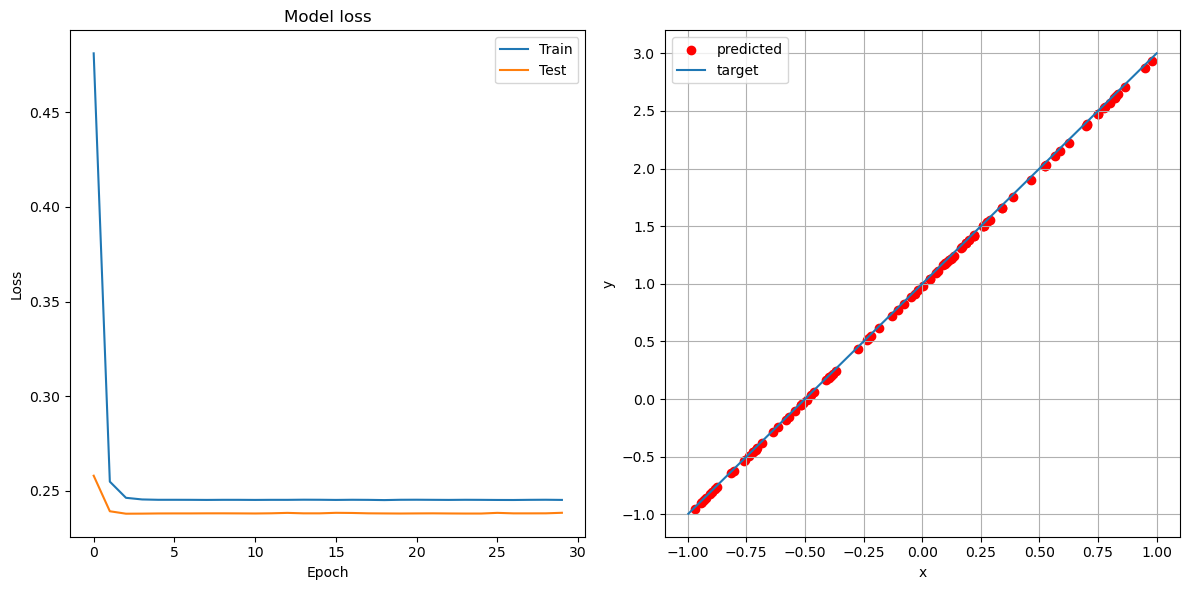

In [19]:
# look into training history
# Plot training & validation loss values
fig, axx = plt.subplots(1, 2, figsize=(12, 6), tight_layout=True)
axx[0].plot(history.history['loss'])
axx[0].plot(history.history['val_loss'])
axx[0].set_title('Model loss')
axx[0].set_ylabel('Loss')
axx[0].set_xlabel('Epoch')
axx[0].legend(['Train', 'Test'], loc='best')

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
axx[1].scatter(x_predicted, y_predicted,color='r', label='predicted')
axx[1].plot(x_valid, y_target, label='target')
axx[1].set_xlabel("x")
axx[1].set_ylabel("y")
axx[1].legend()
axx[1].grid(True)

Incrementing the number of training points gives a better fit. The problem is so simple that the training error is greater than the test one.

# Exercise 11.2

In this exercise we develop a simple neural network with the goal of fitting the polynomial $$ 4-3x-2x^2+3x^3 $$ from a set of noisy data in the interval $x \in [-1, 1]$.

In [55]:
def fitting_polynomial(a, b, c, d, x):
    return d + c*x + b*x**2 + a*x**3

In [56]:
a = 3
b = -2
c = -3
d = 4

In [64]:
x_train2 = np.random.uniform(-1, 1, 5000)
x_valid2 = np.random.uniform(-1, 1, 500)
x_valid2.sort()
y_target2 = fitting_polynomial(a, b, c, d, x_valid2)

sigma2 = 0.2 # noise standard deviation, for the moment it is absent
y_train2 = np.random.normal(fitting_polynomial(a, b, c, d, x_train2), sigma2) # actual measures from which we want to guess regression parameters
y_valid2 = np.random.normal(fitting_polynomial(a, b, c, d, x_valid2), sigma2)

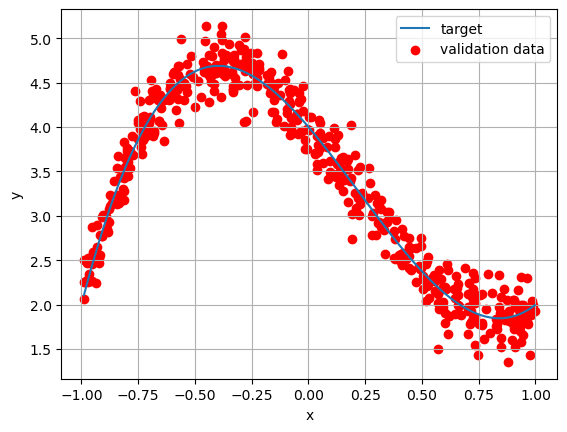

In [58]:
plt.plot(x_valid2, y_target2, label='target')
plt.scatter(x_valid2, y_valid2, color='r', label='validation data')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

## Design of the network

We tried different configurations and we found a reasonable choice for the network's design

### Activation function

As activation function, we choose a reLU: $ f(x) = x \chi_{[0, \infty)} $ because it provides flexibility and has unbounded image. As we will see, the effect of using such activation function is that the network approximates the polynomial with a composition of straight edges.

### Optimizer

As optimizer, we choose Adam, which is a more sophisticated version of stochastic gradient descent.

### Cost function

As a cost function our choice is the MSE (mean squared error) which corresponds to the $L^{(2)}$ metric. 
$$ \frac{1}{N} \sum_{i=1}^N \left| y_i^{out}-y_i^{lab}\right|^2 \text{.}$$ 
We adopt such a choice because it's the simplest metric which is differentiable in its minima (in contrast with the $L^{(1)}$ metric).
### Number of layers and nodes per layer

We find by inspection an optimal configuration with $5$ hidden layers, having 1024 (the former two), 32 (the third and fourth) or 16 (the fifth) neurons each. This configuration corresponds to $1086049$ tunable parameters. Any increase in the number of parameters does not produce improvements that justify the slowness of the training process.

In [66]:
model2 = Sequential()
model2.add(Dense(1024, input_shape=(1,), activation='relu'))
model2.add(Dense(1024, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='relu'))

# compile the model choosing optimizer, loss and metrics objects
model2.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [67]:
# get a summary of our composed model
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 1024)              2048      
                                                                 
 dense_32 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_33 (Dense)            (None, 32)                32800     
                                                                 
 dense_34 (Dense)            (None, 32)                1056      
                                                                 
 dense_35 (Dense)            (None, 16)                528       
                                                                 
 dense_36 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,086,049
Trainable params: 1,086,049
No

In [68]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history2 = model2.fit(x=x_train2, y=y_train2, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid2, y_valid2))

Epoch 1/30
157/157 [==============================] - 4s 15ms/step - loss: 1.1556 - mse: 1.1556 - val_loss: 0.0576 - val_mse: 0.0576
Epoch 2/30
157/157 [==============================] - 5s 30ms/step - loss: 0.0536 - mse: 0.0536 - val_loss: 0.0437 - val_mse: 0.0437
Epoch 3/30
157/157 [==============================] - 3s 16ms/step - loss: 0.0511 - mse: 0.0511 - val_loss: 0.0526 - val_mse: 0.0526
Epoch 4/30
157/157 [==============================] - 3s 18ms/step - loss: 0.0522 - mse: 0.0522 - val_loss: 0.0470 - val_mse: 0.0470
Epoch 5/30
157/157 [==============================] - 2s 15ms/step - loss: 0.0533 - mse: 0.0533 - val_loss: 0.0981 - val_mse: 0.0981
Epoch 6/30
157/157 [==============================] - 2s 15ms/step - loss: 0.0534 - mse: 0.0534 - val_loss: 0.0591 - val_mse: 0.0591
Epoch 7/30
157/157 [==============================] - 3s 21ms/step - loss: 0.0527 - mse: 0.0527 - val_loss: 0.1006 - val_mse: 0.1006
Epoch 8/30
157/157 [==============================] - 4s 23ms/step - 

In [69]:
ex2_path = 'ex2_model.h5'
#model2.save(filepath=ex2_path, include_optimizer=True)

4/4 [==============================] - 0s 20ms/step


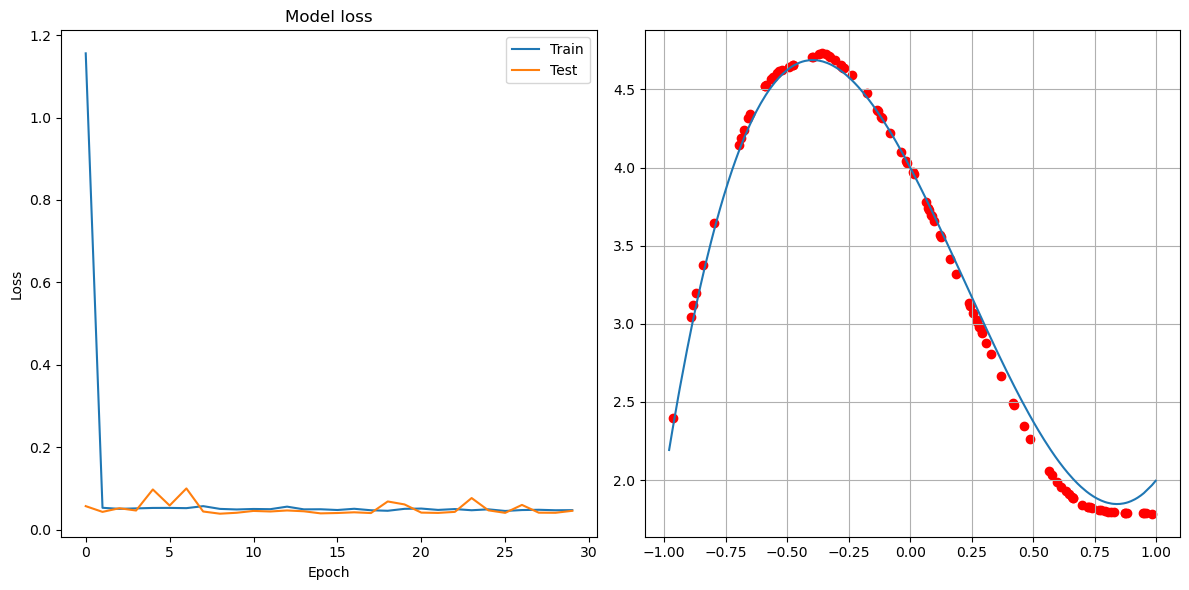

In [70]:
# look into training history
# Plot training & validation loss values
fig, axx = plt.subplots(1, 2, figsize=(12, 6), tight_layout=True)
axx[0].plot(history2.history['loss'])
axx[0].plot(history2.history['val_loss'])
axx[0].set_title('Model loss')
axx[0].set_ylabel('Loss')
axx[0].set_xlabel('Epoch')
axx[0].legend(['Train', 'Test'], loc='best')

#load prediction of best model saved on file
best_model = tf.keras.models.load_model(filepath=ex2_path)
x_predicted2 = np.random.uniform(-1, 1, 100)
y_predicted2 = model2.predict(x_predicted2)
#y_predicted2 = best_model.predict(x_predicted2)
axx[1].scatter(x_predicted2, y_predicted2,color='r', label='predicted')
axx[1].plot(x_valid2, y_target2, label='target')
axx[1].grid(True)

7/7 [==============================] - 0s 18ms/step


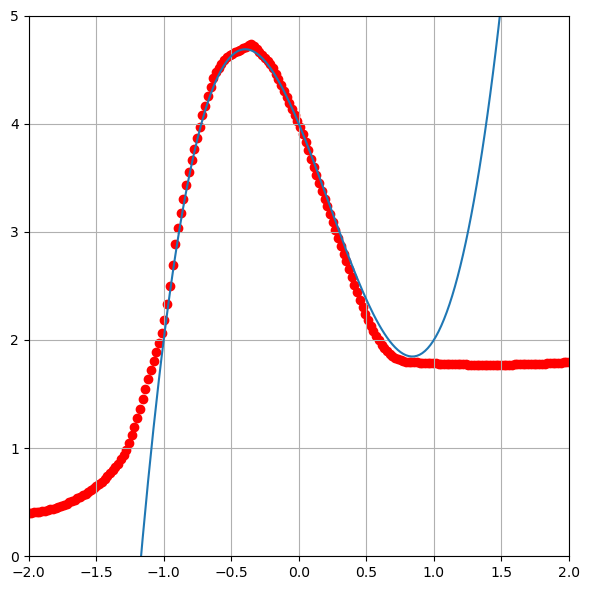

In [71]:
fig, axx = plt.subplots(1, 1, figsize=(6, 6), tight_layout=True)

x_predicted = np.linspace(-2, 2, 200)
y_predicted = model2.predict(x_predicted)
#y_predicted = best_model.predict(x_predicted)
y_target = fitting_polynomial(a, b, c, d, x_predicted)
axx.scatter(x_predicted, y_predicted,color='r')
axx.plot(x_predicted, y_target)
axx.set_xlim(-2, 2)
axx.set_ylim(0, 5)
axx.grid(True)

## Generalization results

As it is clear, the network still hilariously fails to predict the correct behaviour of the polynomial outside the original training interval. The predicted function behaves asimptotically as linear functions with the same slope the curve has near the boundary of the original training interval, probably because the networks simply extends such relu shaped outputs without the necessary corrections. In other words, the network extends globally a behaviour that works only locally. 

# Exercise 11.3

In this exercise, we design a neural network to perform a fit of a function $f:\mathbb{R}^2 \rightarrow \mathbb{R}$ in the subdomain $\vec{x} \in [-\frac{3}{2}, \frac{3}{2}]^2$. Such function is:
$$ f(\vec{x}) = \text{sin}(x_1^2+x_2^2) \text{.}$$
Surprisingly, the network seems to perform way better than in the previous exercise, requiring far less parameters to obtain a still quite good approximation.

In [72]:
def sin_3D(X):
    x, y = X
    return np.sin(x**2 + y**2)

In [73]:
x1_train3 = np.random.uniform(-1.5, 1.5, 5000)
x2_train3 = np.random.uniform(-1.5, 1.5, 5000)
x_train3 = [x1_train3, x2_train3]

x1_valid3 = np.random.uniform(-1.5, 1.5, 500)
x2_valid3 = np.random.uniform(-1.5, 1.5, 500)
x_valid3 = [x1_valid3, x2_valid3]

#for x in x1_valid3:
    #for y in x2_valid3:
#y_target3 = sin_3D(x_valid3)

sigma3 = 0.3
#for x in x1_train3:
    #for y in x2_train3:
y_train3 = np.random.normal(sin_3D(x_train3), sigma3)
#for x in x1_valid3:
    #for y in x2_valid3:
y_valid3 = np.random.normal(sin_3D(x_valid3), sigma3)

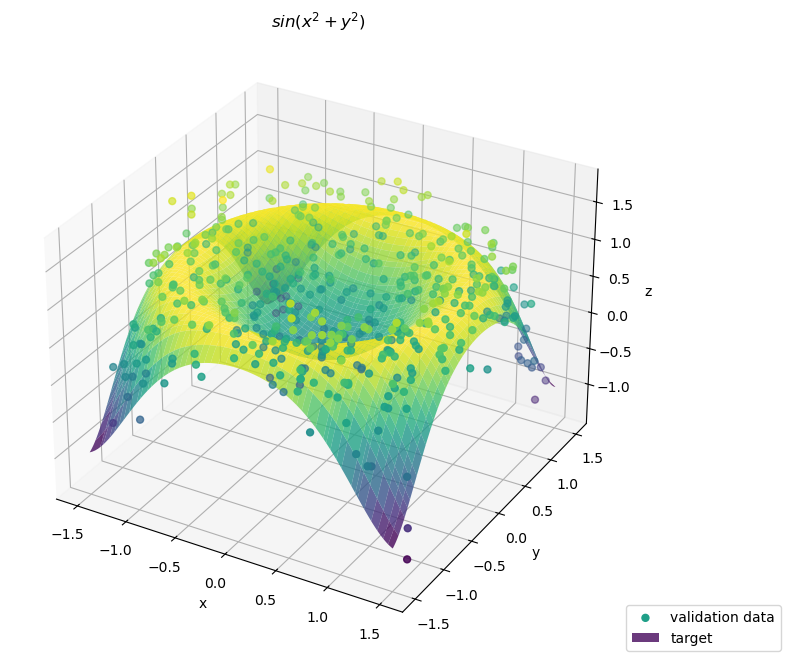

In [98]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))

ax=fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter(x1_valid3, x2_valid3, y_valid3, marker='.', s=100., c=y_valid3, cmap='viridis', label='validation data')
x = x1_valid3.copy()
y = x2_valid3.copy()
x.sort()
y.sort()
X, Y = np.meshgrid(x, y)
grid = [X, Y]
y_target3 = sin_3D(grid)
ax.plot_surface(X, Y, y_target3, cmap='viridis', label="target", alpha=0.8)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title(r"$sin(x^2+y^2)$")
ax.legend(loc=(1, 0))

## Design of the network

The cost function, the optimizer and the activation functions are chosen exactly as in previous exercise. The only change is in the number of hidden layers, which is now only three, and the number of neurons per layer, which are $32$ for the first layer and $16$ for the remaining two. Obviously, the input shape is also different since now the network must accept $2$ input coordinates. The total number of parameters is thus $913$.

In [78]:
model3 = Sequential()
#first layer with input
model3.add(Dense(32, input_shape=(2,), activation = 'relu'))
model3.add(Dense(16, activation = 'relu'))
model3.add(Dense(16, activation = 'relu'))
#output layer
model3.add(Dense(1, activation = 'relu'))

model3.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [79]:
model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 32)                96        
                                                                 
 dense_38 (Dense)            (None, 16)                528       
                                                                 
 dense_39 (Dense)            (None, 16)                272       
                                                                 
 dense_40 (Dense)            (None, 1)                 17        
                                                                 
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________


In [80]:
x_train3 = np.transpose(x_train3)
x_valid3 = np.transpose(x_valid3)
print(x_train3)

[[ 0.51112626 -1.05667407]
 [-0.19490646 -1.00351218]
 [-0.17195213  1.42350508]
 ...
 [-1.37371158 -1.21771227]
 [-0.34544341  0.00839526]
 [-0.60118294 -0.23236306]]


In [81]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history3 = model3.fit(x=x_train3, y=y_train3, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid3, y_valid3))

Epoch 1/30
157/157 [==============================] - 2s 7ms/step - loss: 0.2879 - mse: 0.2879 - val_loss: 0.2327 - val_mse: 0.2327
Epoch 2/30
157/157 [==============================] - 1s 4ms/step - loss: 0.2081 - mse: 0.2081 - val_loss: 0.2097 - val_mse: 0.2097
Epoch 3/30
157/157 [==============================] - 1s 4ms/step - loss: 0.1830 - mse: 0.1830 - val_loss: 0.1836 - val_mse: 0.1836
Epoch 4/30
157/157 [==============================] - 1s 4ms/step - loss: 0.1561 - mse: 0.1561 - val_loss: 0.1539 - val_mse: 0.1539
Epoch 5/30
157/157 [==============================] - 1s 7ms/step - loss: 0.1382 - mse: 0.1382 - val_loss: 0.1335 - val_mse: 0.1335
Epoch 6/30
157/157 [==============================] - 1s 6ms/step - loss: 0.1249 - mse: 0.1249 - val_loss: 0.1232 - val_mse: 0.1232
Epoch 7/30
157/157 [==============================] - 1s 5ms/step - loss: 0.1157 - mse: 0.1157 - val_loss: 0.1184 - val_mse: 0.1184
Epoch 8/30
157/157 [==============================] - 1s 4ms/step - loss: 0.

In [82]:
ex3_path = 'ex3_model.h5'
#model3.save(filepath=ex3_path, include_optimizer=True)

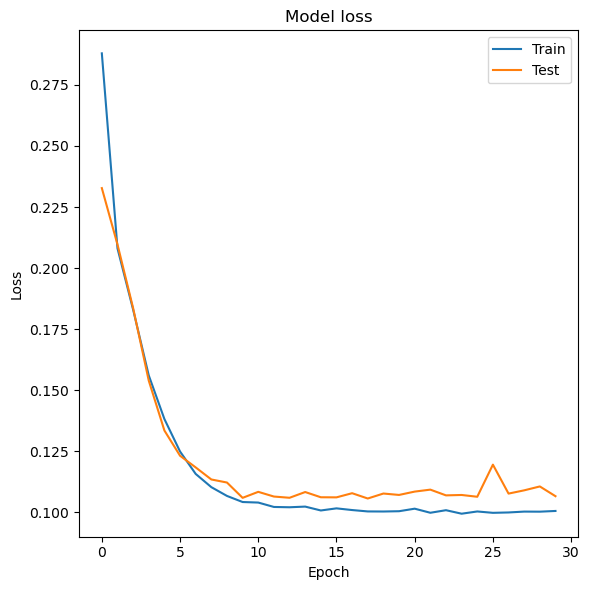

In [83]:
# look into training history
# Plot training & validation loss values
fig, axx = plt.subplots(1, 1, figsize=(6, 6), tight_layout=True)
axx.plot(history3.history['loss'])
axx.plot(history3.history['val_loss'])
axx.set_title('Model loss')
axx.set_ylabel('Loss')
axx.set_xlabel('Epoch')
axx.legend(['Train', 'Test'], loc='best')

16/16 [==============================] - 0s 3ms/step


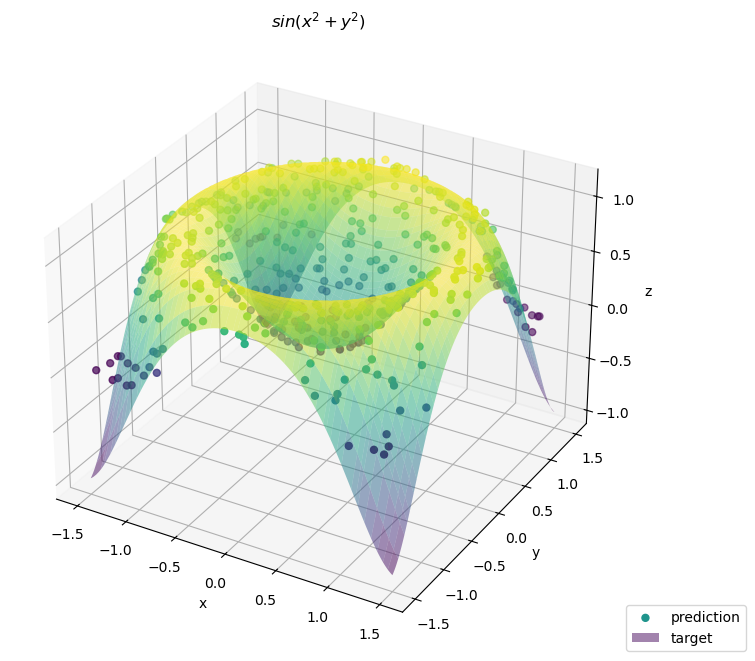

In [99]:
fig = plt.figure(figsize=(8,8))

ax=fig.add_subplot(1, 1, 1, projection='3d')

x_predicted3 = np.zeros((500, 2))
for i in range(x_predicted3.shape[0]):
    x_predicted3[i, 0] = np.random.uniform(-1.5, 1.5)
    x_predicted3[i, 1] = np.random.uniform(-1.5, 1.5)
#print(x_predicted3)
y_predicted3 = model3.predict(x_predicted3)
#print(y_predicted)
ax.scatter(x_predicted3[:,0], x_predicted3[:,1], y_predicted3, marker='.', s=100., c=y_predicted3, cmap='viridis', label='prediction')

x = np.transpose(x1_valid3).copy()
y = np.transpose(x2_valid3).copy()
x.sort()
y.sort()
X, Y = np.meshgrid(x, y)
grid = [X, Y]
y_target3 = sin_3D(grid)
ax.plot_surface(X, Y, y_target3, cmap='viridis', label="target", alpha=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title(r"$sin(x^2+y^2)$")
ax.legend(loc=(1, 0))